<a href="https://colab.research.google.com/github/CapZondar/FuelEDA/blob/main/Graphing_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel('https://query.data.world/s/6ennyiwremvf2iqlwbkt53mgmvui3s')

In [ ]:
display (df.head())
df.info()

,Date,Petrol (USD),Diesel (USD)
0,2003-06-09 00:00:00,74.590284,76.773394
1,2003-06-16 00:00:00,74.469143,76.689054
2,2003-06-23 00:00:00,74.423566,76.620546
3,2003-06-30 00:00:00,74.352421,76.505260
4,2003-07-07 00:00:00,74.283737,76.457376


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          882 non-null    object 
 1   Petrol (USD)  881 non-null    float64
 2   Diesel (USD)  881 non-null    float64
dtypes: float64(2), object(1)
memory usage: 20.8+ KB


In [ ]:
df.tail()

,Date,Petrol (USD),Diesel (USD)
878,2020-04-06 00:00:00,110.234797,116.833354
879,2020-04-13 00:00:00,109.265819,116.150812
880,2020-04-20 00:00:00,108.632747,115.732573
881,NaN,NaN,NaN
882,Return to Contents page,NaN,NaN


In [ ]:
df.drop(df.index[[881,882]],inplace=True)
df['Year'] = pd.to_datetime(df['Date'])
df['Year'] = df['Year'].dt.strftime('%Y')
df.drop(['Date'],axis=1,inplace=True)

In [ ]:
df

,Petrol (USD),Diesel (USD),Year
0,74.590284,76.773394,2003
1,74.469143,76.689054,2003
2,74.423566,76.620546,2003
3,74.352421,76.505260,2003
4,74.283737,76.457376,2003
...,...,...,...
876,119.644504,123.409485,2020
877,112.452709,118.597998,2020
878,110.234797,116.833354,2020
879,109.265819,116.150812,2020


In [ ]:
per_year = df.groupby('Year')[['Petrol (USD)', 'Diesel (USD)']].mean()

per_year

,Petrol (USD),Diesel (USD)
Year,,
2003,75.591537,77.287333
2004,80.254930,81.894003
2005,86.796860,90.820266
2006,91.395871,95.179094
2007,94.495094,97.112432
2008,107.001178,117.556702
2009,99.593804,104.146614
2010,116.904146,119.234615
2011,133.412774,138.805382


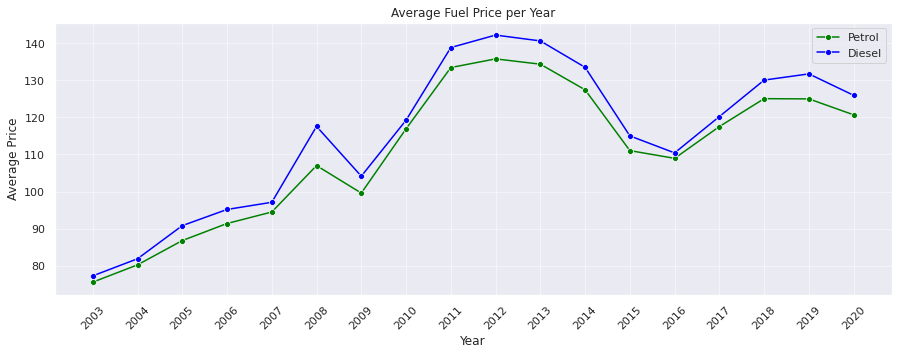

In [ ]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(15,5))
plt.grid(alpha=0.5)
plt.title('Average Fuel Price per Year')
plt.ylabel('Average Price')
plt.xticks(rotation=45)

sns.lineplot(x='Year',y='Petrol (USD)',data=per_year,color='green',marker='o')
sns.lineplot(x='Year',y='Diesel (USD)',data=per_year,color='blue',marker='o').legend(labels=['Petrol','Diesel'])


plt.show()